In [ ]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import wandb

wandb.login()

keras.__version__
tf.__version__


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


'2.15.0'

In [ ]:
rawData = pd.read_excel("Full-Data-Set-UnderOver-2020-21.xlsx")
print(rawData)
rawData = rawData.sample(frac=1) #randomize the arrangement of rawData
print(rawData)


       Unnamed: 0               TEAM_NAME  GP  W  L  W_PCT   MIN   FGM   FGA  \
0               0       Charlotte Bobcats   1  1  0  1.000  48.0  37.0  76.0   
1               1           Orlando Magic   2  1  1  0.500  48.0  31.5  75.0   
2               2          Indiana Pacers   2  2  0  1.000  50.5  35.5  87.5   
3               3         New Jersey Nets   2  1  1  0.500  50.5  29.0  75.0   
4               4           Atlanta Hawks   1  1  0  1.000  48.0  36.0  79.0   
...           ...                     ...  .. .. ..    ...   ...   ...   ...   
16353       16353         New York Knicks  12  5  7  0.417  48.0  38.1  85.3   
16354       16354   Oklahoma City Thunder  11  5  6  0.455  48.0  38.2  85.4   
16355       16355  Minnesota Timberwolves  11  3  8  0.273  48.5  40.5  91.4   
16356       16356        Sacramento Kings  12  5  7  0.417  48.4  41.4  87.9   
16357       16357             LA Clippers  12  8  4  0.667  48.0  39.8  84.2   

       FG_PCT  ...  BLKA_RANK.1  PF_RAN

In [ ]:
rawData.describe()

,Unnamed: 0,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Score,Home-Team-Win,OU,OU-Cover
count,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,...,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000,16358.000000
mean,8178.500000,42.738538,22.225883,20.512654,0.513536,48.353754,37.952763,83.493654,0.454603,8.192689,...,15.307984,15.168480,15.353344,15.477809,15.275095,15.036007,204.782186,0.591148,204.598392,0.515344
std,4722.292187,24.007672,15.430625,13.403097,0.183969,0.325391,2.318313,3.831431,0.019487,2.528331,...,8.621444,8.633495,8.640666,8.612438,8.633568,8.664541,22.006642,0.491637,21.729718,0.526352
min,0.000000,1.000000,0.000000,0.000000,0.000000,48.000000,28.000000,67.300000,0.339000,0.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,0.000000,1.000000,0.000000
25%,4089.250000,22.000000,10.000000,9.000000,0.382000,48.100000,36.400000,80.900000,0.442000,6.300000,...,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,190.000000,0.000000,194.500000,0.000000
50%,8178.500000,43.000000,19.000000,19.000000,0.520000,48.300000,37.800000,83.400000,0.454000,7.900000,...,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000,204.000000,1.000000,203.500000,1.000000
75%,12267.750000,64.000000,32.000000,29.000000,0.645000,48.500000,39.300000,86.100000,0.467000,9.900000,...,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,219.000000,1.000000,214.000000,1.000000
max,16357.000000,82.000000,72.000000,69.000000,1.000000,55.500000,50.000000,100.000000,0.571000,20.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,329.000000,1.000000,1955.500000,2.000000


DATA CLEANING


In [ ]:
rawData.rename(columns={'TEAM_NAME.1': 'AWAY_TEAM_NAME'}, inplace=True)
print(list(rawData.columns))


['Unnamed: 0', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'Date', 'AWAY_TEAM_NAME', 'GP.1', 'W.1', 'L.1', 'W_PCT.1', 'MIN.1', 'FGM.1', 'FGA.1', 'FG_PCT.1', 'FG3M.1', 'FG3A.1', 'FG3_PCT.1', 'FTM.1', 'FTA.1', 'FT_PCT.1', 'OREB.1', 'DREB.1', 'REB.1', 'AST.1', 'TOV.1', 'STL.1', 'BLK.1', 'BLKA.1', 'PF.1', 'PFD.1', 'PTS.1', 'PLUS_MINUS.1', 'GP_RANK.1', 'W_RANK.1', 'L_RANK.1', 'W_PCT_RANK.1', 'MIN_RANK.1', 'FGM_RANK.1', 'FGA_RANK.1', 'FG_PCT_RANK.1', 'FG3M_RANK.1', 'FG3A_RANK.1', 'FG3_PCT_RANK.1', 'FTM

In [ ]:
filteredData = rawData.drop(["Unnamed: 0"], axis = 1)
filteredData = filteredData.drop(["Score"], axis = 1)
filteredData = filteredData.drop(["GP"], axis = 1)
filteredData = filteredData.drop(["GP.1"], axis = 1)
filteredData = filteredData.drop(["Home-Team-Win"], axis = 1)
filteredData = filteredData.drop(["TEAM_NAME"], axis = 1)
filteredData = filteredData.drop(["Date"], axis = 1)
filteredData = filteredData.drop(["MIN"], axis = 1)
filteredData = filteredData.drop(["MIN.1"], axis = 1)
filteredData = filteredData.drop(["AWAY_TEAM_NAME"], axis = 1)
filteredData = filteredData.drop(["Date.1"], axis = 1)
filteredData = filteredData.drop(["OU"], axis = 1)
filteredData = filteredData.drop(["OU-Cover"], axis = 1)
filteredData = filteredData.drop(["GP_RANK"], axis = 1)
filteredData = filteredData.drop(["GP_RANK.1"], axis = 1)
filteredData = filteredData.drop(["MIN_RANK"], axis = 1)
filteredData = filteredData.drop(["MIN_RANK.1"], axis = 1)

In [ ]:
filteredData = filteredData.astype(float)
type(filteredData)

pandas.core.frame.DataFrame

In [ ]:
filteredData.head()

,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,REB_RANK.1,AST_RANK.1,TOV_RANK.1,STL_RANK.1,BLK_RANK.1,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1
12594,42.0,39.0,0.519,38.8,81.8,0.475,8.9,23.8,0.372,17.3,...,20.0,30.0,4.0,4.0,11.0,14.0,23.0,10.0,10.0,5.0
53,4.0,0.0,1.000,40.8,75.5,0.540,8.0,19.0,0.421,17.0,...,17.0,27.0,25.0,6.0,2.0,30.0,12.0,19.0,24.0,18.0
15317,2.0,13.0,0.133,38.9,88.8,0.438,9.3,28.2,0.329,18.8,...,30.0,21.0,14.0,8.0,20.0,20.0,8.0,3.0,23.0,15.0
7585,3.0,3.0,0.500,38.0,80.2,0.474,5.2,15.3,0.337,17.3,...,13.0,6.0,30.0,6.0,4.0,4.0,28.0,17.0,10.0,2.0
13577,39.0,26.0,0.600,39.9,87.9,0.454,10.6,29.9,0.354,16.7,...,16.0,20.0,20.0,16.0,14.0,27.0,21.0,1.0,8.0,17.0


In [ ]:
output = rawData['Home-Team-Win']

In [ ]:
raw_Team_Names = rawData[['TEAM_NAME', 'AWAY_TEAM_NAME']].astype(str)

In [ ]:
# prompt: print all the columns names for filtered data

print(list(filteredData.columns))


['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'W.1', 'L.1', 'W_PCT.1', 'FGM.1', 'FGA.1', 'FG_PCT.1', 'FG3M.1', 'FG3A.1', 'FG3_PCT.1', 'FTM.1', 'FTA.1', 'FT_PCT.1', 'OREB.1', 'DREB.1', 'REB.1', 'AST.1', 'TOV.1', 'STL.1', 'BLK.1', 'BLKA.1', 'PF.1', 'PFD.1', 'PTS.1', 'PLUS_MINUS.1', 'W_RANK.1', 'L_RANK.1', 'W_PCT_RANK.1', 'FGM_RANK.1', 'FGA_RANK.1', 'FG_PCT_RANK.1', 'FG3M_RANK.1', 'FG3A_RANK.1', 'FG3_PCT_RANK.1', 'FTM_RANK.1', 'FTA_RANK.1', 'FT_PCT_RANK.1', 'OREB_RANK.1', 'DREB_RANK.1', 'REB_RANK.1', 'AST_RANK.1', 'TOV_RANK.1', 'STL_RANK.1', 'BLK_R

In [ ]:
columns_to_process = ['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']

for col in columns_to_process:
    filteredData[col] = filteredData[col] - filteredData[col + '.1']


columns_to_drop = [col for col in filteredData.columns if col.endswith('.1')]


filteredData.drop(columns=columns_to_drop, inplace=True)


In [ ]:
filteredData.head()

,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
12594,-8.0,9.0,-0.106,-0.4,-2.5,0.010,-0.1,-0.7,0.006,-2.4,...,9.0,-25.0,14.0,4.0,-5.0,-5.0,-6.0,13.0,10.0,11.0
53,2.0,-3.0,0.600,7.6,-0.3,0.102,3.2,5.0,0.078,-4.2,...,6.0,-25.0,3.0,-5.0,20.0,-21.0,8.0,-6.0,-19.0,-17.0
15317,-3.0,6.0,-0.284,0.1,5.4,-0.028,-1.2,-1.6,-0.024,-1.0,...,-7.0,-6.0,-6.0,10.0,-5.0,3.0,-3.0,23.0,4.0,14.0
7585,-1.0,0.0,-0.071,-0.6,-0.2,-0.006,-6.1,-10.8,-0.095,3.2,...,12.0,7.0,-8.0,17.0,24.0,10.0,-14.0,1.0,5.0,16.0
13577,6.0,-4.0,0.076,-0.4,2.8,-0.019,0.9,2.1,0.005,-2.6,...,-13.0,9.0,-5.0,-13.0,-7.0,-11.0,-3.0,2.0,4.0,-8.0


In [ ]:
#get 80% for training 20% for testing
print(len(filteredData))
test_len = int(len(filteredData) * 0.8)
x_train = filteredData.take(range(test_len))
x_test = filteredData.take(range(test_len, len(filteredData)))
y_train = output.take(range(test_len))
y_test = output.take(range(test_len, len(filteredData)))
Test_Team_Names = raw_Team_Names.take(range(test_len, len(filteredData)))

16358


In [ ]:
x_rawdata = rawData.take(range(test_len, len(filteredData)))

In [ ]:
# import datetime
# %load_ext tensorboard
# log_dir = "logs/fit/"
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
from keras.optimizers import Adam
from wandb.keras import WandbCallback
wandb.init(project = "BasketballWINLOSS")

wandb: Currently logged in as: guisewitecaleb (calebg225). Use `wandb login --relogin` to force relogin


MODEL

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu6))
model.add(tf.keras.layers.Dropout(rate=.30))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu6))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax, name="output_layer"))

In [ ]:
model.compile(Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=600, batch_size=3000, validation_split= .2 , callbacks=[WandbCallback()])

Epoch 1/600
1/4 [======>.......................] - ETA: 3s - loss: 1.9625 - accuracy: 0.5580

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 336ms/step - loss: 1.9218 - accuracy: 0.5411 - val_loss: 1.4163 - val_accuracy: 0.5374
Epoch 2/600
1/4 [======>.......................] - ETA: 0s - loss: 1.7194 - accuracy: 0.5370

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 514ms/step - loss: 1.6648 - accuracy: 0.5374 - val_loss: 1.2251 - val_accuracy: 0.5302
Epoch 3/600
1/4 [======>.......................] - ETA: 0s - loss: 1.5131 - accuracy: 0.5267

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 562ms/step - loss: 1.4472 - accuracy: 0.5412 - val_loss: 1.1062 - val_accuracy: 0.5424
Epoch 4/600
1/4 [======>.......................] - ETA: 0s - loss: 1.3366 - accuracy: 0.5460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 449ms/step - loss: 1.3229 - accuracy: 0.5398 - val_loss: 1.0392 - val_accuracy: 0.5508
Epoch 5/600
1/4 [======>.......................] - ETA: 0s - loss: 1.1918 - accuracy: 0.5437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 340ms/step - loss: 1.2181 - accuracy: 0.5491 - val_loss: 0.9966 - val_accuracy: 0.5649
Epoch 6/600
1/4 [======>.......................] - ETA: 0s - loss: 1.1330 - accuracy: 0.5667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 261ms/step - loss: 1.1501 - accuracy: 0.5634 - val_loss: 0.9592 - val_accuracy: 0.5791
Epoch 7/600
1/4 [======>.......................] - ETA: 0s - loss: 1.1520 - accuracy: 0.5643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 326ms/step - loss: 1.1152 - accuracy: 0.5727 - val_loss: 0.9199 - val_accuracy: 0.6005
Epoch 8/600
1/4 [======>.......................] - ETA: 0s - loss: 1.0947 - accuracy: 0.5873

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 340ms/step - loss: 1.0635 - accuracy: 0.5900 - val_loss: 0.8818 - val_accuracy: 0.6176
Epoch 9/600
1/4 [======>.......................] - ETA: 0s - loss: 1.0504 - accuracy: 0.5953

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 278ms/step - loss: 1.0203 - accuracy: 0.5939 - val_loss: 0.8470 - val_accuracy: 0.6303
Epoch 10/600
1/4 [======>.......................] - ETA: 0s - loss: 0.9421 - accuracy: 0.6233

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 332ms/step - loss: 0.9698 - accuracy: 0.6183 - val_loss: 0.8179 - val_accuracy: 0.6383
Epoch 11/600
1/4 [======>.......................] - ETA: 0s - loss: 0.9672 - accuracy: 0.6170

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 306ms/step - loss: 0.9812 - accuracy: 0.6145 - val_loss: 0.7930 - val_accuracy: 0.6448
Epoch 12/600
1/4 [======>.......................] - ETA: 0s - loss: 0.9485 - accuracy: 0.6200

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 419ms/step - loss: 0.9342 - accuracy: 0.6225 - val_loss: 0.7730 - val_accuracy: 0.6505
Epoch 13/600
1/4 [======>.......................] - ETA: 0s - loss: 0.9547 - accuracy: 0.6153

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 334ms/step - loss: 0.9189 - accuracy: 0.6234 - val_loss: 0.7566 - val_accuracy: 0.6513
Epoch 14/600
1/4 [======>.......................] - ETA: 0s - loss: 0.9229 - accuracy: 0.6223

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 494ms/step - loss: 0.9094 - accuracy: 0.6198 - val_loss: 0.7450 - val_accuracy: 0.6532
Epoch 15/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8997 - accuracy: 0.6187

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 557ms/step - loss: 0.8830 - accuracy: 0.6244 - val_loss: 0.7350 - val_accuracy: 0.6566
Epoch 16/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8773 - accuracy: 0.6220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 374ms/step - loss: 0.8845 - accuracy: 0.6161 - val_loss: 0.7275 - val_accuracy: 0.6589
Epoch 17/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8486 - accuracy: 0.6267

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 330ms/step - loss: 0.8503 - accuracy: 0.6301 - val_loss: 0.7209 - val_accuracy: 0.6558
Epoch 18/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8156 - accuracy: 0.6317

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 336ms/step - loss: 0.8374 - accuracy: 0.6247 - val_loss: 0.7143 - val_accuracy: 0.6604
Epoch 19/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8233 - accuracy: 0.6347

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 278ms/step - loss: 0.8337 - accuracy: 0.6284 - val_loss: 0.7076 - val_accuracy: 0.6597
Epoch 20/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8046 - accuracy: 0.6327

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 345ms/step - loss: 0.8186 - accuracy: 0.6288 - val_loss: 0.7014 - val_accuracy: 0.6620
Epoch 21/600
1/4 [======>.......................] - ETA: 0s - loss: 0.8505 - accuracy: 0.6213

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 342ms/step - loss: 0.8221 - accuracy: 0.6282 - val_loss: 0.6974 - val_accuracy: 0.6620
Epoch 22/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7996 - accuracy: 0.6357

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 268ms/step - loss: 0.8087 - accuracy: 0.6300 - val_loss: 0.6922 - val_accuracy: 0.6639
Epoch 23/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7792 - accuracy: 0.6437

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 341ms/step - loss: 0.8036 - accuracy: 0.6353 - val_loss: 0.6887 - val_accuracy: 0.6665
Epoch 24/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7870 - accuracy: 0.6417

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 358ms/step - loss: 0.8026 - accuracy: 0.6313 - val_loss: 0.6842 - val_accuracy: 0.6673
Epoch 25/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7611 - accuracy: 0.6413

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 500ms/step - loss: 0.7709 - accuracy: 0.6367 - val_loss: 0.6794 - val_accuracy: 0.6654
Epoch 26/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7870 - accuracy: 0.6207

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 373ms/step - loss: 0.7828 - accuracy: 0.6293 - val_loss: 0.6761 - val_accuracy: 0.6684
Epoch 27/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7657 - accuracy: 0.6343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 410ms/step - loss: 0.7672 - accuracy: 0.6347 - val_loss: 0.6736 - val_accuracy: 0.6700
Epoch 28/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7533 - accuracy: 0.6427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 520ms/step - loss: 0.7660 - accuracy: 0.6387 - val_loss: 0.6710 - val_accuracy: 0.6684
Epoch 29/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7598 - accuracy: 0.6420

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 310ms/step - loss: 0.7614 - accuracy: 0.6327 - val_loss: 0.6677 - val_accuracy: 0.6711
Epoch 30/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7562 - accuracy: 0.6433

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 310ms/step - loss: 0.7544 - accuracy: 0.6434 - val_loss: 0.6640 - val_accuracy: 0.6715
Epoch 31/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7455 - accuracy: 0.6447

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 344ms/step - loss: 0.7533 - accuracy: 0.6378 - val_loss: 0.6595 - val_accuracy: 0.6711
Epoch 32/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7692 - accuracy: 0.6337

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 301ms/step - loss: 0.7436 - accuracy: 0.6408 - val_loss: 0.6561 - val_accuracy: 0.6734
Epoch 33/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7346 - accuracy: 0.6393

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 302ms/step - loss: 0.7422 - accuracy: 0.6349 - val_loss: 0.6533 - val_accuracy: 0.6749
Epoch 34/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7254 - accuracy: 0.6413

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 371ms/step - loss: 0.7322 - accuracy: 0.6397 - val_loss: 0.6509 - val_accuracy: 0.6746
Epoch 35/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7408 - accuracy: 0.6377

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 302ms/step - loss: 0.7222 - accuracy: 0.6483 - val_loss: 0.6496 - val_accuracy: 0.6749
Epoch 36/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7460 - accuracy: 0.6343

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 381ms/step - loss: 0.7370 - accuracy: 0.6406 - val_loss: 0.6493 - val_accuracy: 0.6742
Epoch 37/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7219 - accuracy: 0.6467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 458ms/step - loss: 0.7202 - accuracy: 0.6467 - val_loss: 0.6490 - val_accuracy: 0.6757
Epoch 38/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7074 - accuracy: 0.6493

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 597ms/step - loss: 0.7148 - accuracy: 0.6467 - val_loss: 0.6459 - val_accuracy: 0.6757
Epoch 39/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7112 - accuracy: 0.6483

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 613ms/step - loss: 0.7148 - accuracy: 0.6490 - val_loss: 0.6431 - val_accuracy: 0.6765
Epoch 40/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7097 - accuracy: 0.6543

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 331ms/step - loss: 0.7119 - accuracy: 0.6485 - val_loss: 0.6404 - val_accuracy: 0.6780
Epoch 41/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7100 - accuracy: 0.6397

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 398ms/step - loss: 0.7146 - accuracy: 0.6481 - val_loss: 0.6376 - val_accuracy: 0.6818
Epoch 42/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7141 - accuracy: 0.6427

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 317ms/step - loss: 0.7076 - accuracy: 0.6468 - val_loss: 0.6348 - val_accuracy: 0.6830
Epoch 43/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7109 - accuracy: 0.6540

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 336ms/step - loss: 0.7017 - accuracy: 0.6554 - val_loss: 0.6320 - val_accuracy: 0.6868
Epoch 44/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7179 - accuracy: 0.6480

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 346ms/step - loss: 0.7030 - accuracy: 0.6505 - val_loss: 0.6297 - val_accuracy: 0.6860
Epoch 45/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7126 - accuracy: 0.6380

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 323ms/step - loss: 0.6901 - accuracy: 0.6517 - val_loss: 0.6286 - val_accuracy: 0.6853
Epoch 46/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7040 - accuracy: 0.6470

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 290ms/step - loss: 0.6886 - accuracy: 0.6578 - val_loss: 0.6273 - val_accuracy: 0.6845
Epoch 47/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7086 - accuracy: 0.6440

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 363ms/step - loss: 0.6906 - accuracy: 0.6578 - val_loss: 0.6263 - val_accuracy: 0.6860
Epoch 48/600
1/4 [======>.......................] - ETA: 0s - loss: 0.7020 - accuracy: 0.6463

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 284ms/step - loss: 0.6872 - accuracy: 0.6532 - val_loss: 0.6256 - val_accuracy: 0.6864
Epoch 49/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6837 - accuracy: 0.6530

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 406ms/step - loss: 0.6937 - accuracy: 0.6502 - val_loss: 0.6234 - val_accuracy: 0.6872
Epoch 50/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6826 - accuracy: 0.6557

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 417ms/step - loss: 0.6788 - accuracy: 0.6600 - val_loss: 0.6206 - val_accuracy: 0.6895
Epoch 51/600
4/4 [==============================] - ETA: 0s - loss: 0.6769 - accuracy: 0.6552

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 560ms/step - loss: 0.6769 - accuracy: 0.6552 - val_loss: 0.6175 - val_accuracy: 0.6891
Epoch 52/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6675 - accuracy: 0.6460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 476ms/step - loss: 0.6785 - accuracy: 0.6566 - val_loss: 0.6152 - val_accuracy: 0.6883
Epoch 53/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6629 - accuracy: 0.6590

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 286ms/step - loss: 0.6680 - accuracy: 0.6573 - val_loss: 0.6143 - val_accuracy: 0.6887
Epoch 54/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6617

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 275ms/step - loss: 0.6647 - accuracy: 0.6583 - val_loss: 0.6143 - val_accuracy: 0.6891
Epoch 55/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6634 - accuracy: 0.6656 - val_loss: 0.6143 - val_accuracy: 0.6898
Epoch 56/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 356ms/step - loss: 0.6695 - accuracy: 0.6646 - val_loss: 0.6131 - val_accuracy: 0.6921
Epoch 57/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6718 - accuracy: 0.6620

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 269ms/step - loss: 0.6686 - accuracy: 0.6607 - val_loss: 0.6115 - val_accuracy: 0.6933
Epoch 58/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6437 - accuracy: 0.6750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 324ms/step - loss: 0.6655 - accuracy: 0.6646 - val_loss: 0.6097 - val_accuracy: 0.6948
Epoch 59/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6565 - accuracy: 0.6633

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 339ms/step - loss: 0.6506 - accuracy: 0.6713 - val_loss: 0.6078 - val_accuracy: 0.6952
Epoch 60/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 275ms/step - loss: 0.6596 - accuracy: 0.6617 - val_loss: 0.6061 - val_accuracy: 0.6960
Epoch 61/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6640

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 344ms/step - loss: 0.6593 - accuracy: 0.6647 - val_loss: 0.6050 - val_accuracy: 0.6963
Epoch 62/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6637

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 394ms/step - loss: 0.6502 - accuracy: 0.6650 - val_loss: 0.6037 - val_accuracy: 0.6986
Epoch 63/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6677

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 569ms/step - loss: 0.6509 - accuracy: 0.6656 - val_loss: 0.6027 - val_accuracy: 0.6982
Epoch 64/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6496 - accuracy: 0.6773

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.1s


4/4 [==============================] - 2s 665ms/step - loss: 0.6516 - accuracy: 0.6677 - val_loss: 0.6020 - val_accuracy: 0.6979
Epoch 65/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6571 - accuracy: 0.6703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 506ms/step - loss: 0.6500 - accuracy: 0.6671 - val_loss: 0.6017 - val_accuracy: 0.6982
Epoch 66/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6504 - accuracy: 0.6600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 602ms/step - loss: 0.6459 - accuracy: 0.6717 - val_loss: 0.6008 - val_accuracy: 0.6975
Epoch 67/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6597

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 483ms/step - loss: 0.6452 - accuracy: 0.6677 - val_loss: 0.5997 - val_accuracy: 0.6986
Epoch 68/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6434 - accuracy: 0.6610

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 279ms/step - loss: 0.6504 - accuracy: 0.6652 - val_loss: 0.5982 - val_accuracy: 0.7013
Epoch 69/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6398 - accuracy: 0.6833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 313ms/step - loss: 0.6366 - accuracy: 0.6774 - val_loss: 0.5965 - val_accuracy: 0.7032
Epoch 70/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6428 - accuracy: 0.6643

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 326ms/step - loss: 0.6499 - accuracy: 0.6675 - val_loss: 0.5950 - val_accuracy: 0.7032
Epoch 71/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6588 - accuracy: 0.6660

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 276ms/step - loss: 0.6433 - accuracy: 0.6698 - val_loss: 0.5937 - val_accuracy: 0.7055
Epoch 72/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6278 - accuracy: 0.6767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 366ms/step - loss: 0.6343 - accuracy: 0.6732 - val_loss: 0.5926 - val_accuracy: 0.7047
Epoch 73/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6647

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 414ms/step - loss: 0.6376 - accuracy: 0.6733 - val_loss: 0.5918 - val_accuracy: 0.7055
Epoch 74/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6627

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 539ms/step - loss: 0.6407 - accuracy: 0.6723 - val_loss: 0.5911 - val_accuracy: 0.7066
Epoch 75/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6358 - accuracy: 0.6763

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 322ms/step - loss: 0.6329 - accuracy: 0.6735 - val_loss: 0.5907 - val_accuracy: 0.7055
Epoch 76/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6923

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 356ms/step - loss: 0.6306 - accuracy: 0.6828 - val_loss: 0.5904 - val_accuracy: 0.7036
Epoch 77/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6416 - accuracy: 0.6747

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 282ms/step - loss: 0.6303 - accuracy: 0.6740 - val_loss: 0.5899 - val_accuracy: 0.7044
Epoch 78/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6373 - accuracy: 0.6633

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 327ms/step - loss: 0.6331 - accuracy: 0.6732 - val_loss: 0.5893 - val_accuracy: 0.7040
Epoch 79/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6790

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 427ms/step - loss: 0.6318 - accuracy: 0.6731 - val_loss: 0.5886 - val_accuracy: 0.7047
Epoch 80/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6372 - accuracy: 0.6630

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 338ms/step - loss: 0.6309 - accuracy: 0.6752 - val_loss: 0.5885 - val_accuracy: 0.7028
Epoch 81/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6145 - accuracy: 0.6833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 343ms/step - loss: 0.6308 - accuracy: 0.6758 - val_loss: 0.5872 - val_accuracy: 0.7036
Epoch 82/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6783

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 274ms/step - loss: 0.6284 - accuracy: 0.6743 - val_loss: 0.5863 - val_accuracy: 0.7044
Epoch 83/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6350 - accuracy: 0.6687

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 343ms/step - loss: 0.6297 - accuracy: 0.6720 - val_loss: 0.5857 - val_accuracy: 0.7040
Epoch 84/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6429 - accuracy: 0.6753

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 265ms/step - loss: 0.6232 - accuracy: 0.6802 - val_loss: 0.5851 - val_accuracy: 0.7028
Epoch 85/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 473ms/step - loss: 0.6234 - accuracy: 0.6756 - val_loss: 0.5847 - val_accuracy: 0.7059
Epoch 86/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6213 - accuracy: 0.6863

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 546ms/step - loss: 0.6239 - accuracy: 0.6788 - val_loss: 0.5846 - val_accuracy: 0.7055
Epoch 87/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6065 - accuracy: 0.6920

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 463ms/step - loss: 0.6196 - accuracy: 0.6832 - val_loss: 0.5841 - val_accuracy: 0.7063
Epoch 88/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6256 - accuracy: 0.6747

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 366ms/step - loss: 0.6206 - accuracy: 0.6779 - val_loss: 0.5826 - val_accuracy: 0.7051
Epoch 89/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6241 - accuracy: 0.6637

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 264ms/step - loss: 0.6249 - accuracy: 0.6720 - val_loss: 0.5814 - val_accuracy: 0.7074
Epoch 90/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6061 - accuracy: 0.6900

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 352ms/step - loss: 0.6149 - accuracy: 0.6854 - val_loss: 0.5803 - val_accuracy: 0.7089
Epoch 91/600
4/4 [==============================] - 0s 19ms/step - loss: 0.6187 - accuracy: 0.6825 - val_loss: 0.5806 - val_accuracy: 0.7063
Epoch 92/600
4/4 [==============================] - 0s 15ms/step - loss: 0.6157 - accuracy: 0.6770 - val_loss: 0.5812 - val_accuracy: 0.7047
Epoch 93/600
4/4 [==============================] - 0s 15ms/step - loss: 0.6159 - accuracy: 0.6810 - val_loss: 0.5812 - val_accuracy: 0.7059
Epoch 94/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6186 - accuracy: 0.6792 - val_loss: 0.5804 - val_accuracy: 0.7074
Epoch 95/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6142 - accuracy: 0.6847

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 367ms/step - loss: 0.6191 - accuracy: 0.6784 - val_loss: 0.5798 - val_accuracy: 0.7078
Epoch 96/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6076 - accuracy: 0.6893

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 413ms/step - loss: 0.6111 - accuracy: 0.6845 - val_loss: 0.5793 - val_accuracy: 0.7078
Epoch 97/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6135 - accuracy: 0.6770

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 297ms/step - loss: 0.6125 - accuracy: 0.6829 - val_loss: 0.5783 - val_accuracy: 0.7070
Epoch 98/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5910 - accuracy: 0.6960

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 356ms/step - loss: 0.6052 - accuracy: 0.6861 - val_loss: 0.5778 - val_accuracy: 0.7078
Epoch 99/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6076 - accuracy: 0.6953

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 288ms/step - loss: 0.6142 - accuracy: 0.6803 - val_loss: 0.5773 - val_accuracy: 0.7089
Epoch 100/600
4/4 [==============================] - 0s 14ms/step - loss: 0.6081 - accuracy: 0.6899 - val_loss: 0.5773 - val_accuracy: 0.7086
Epoch 101/600
4/4 [==============================] - 0s 15ms/step - loss: 0.6087 - accuracy: 0.6861 - val_loss: 0.5777 - val_accuracy: 0.7086
Epoch 102/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6000 - accuracy: 0.6810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 361ms/step - loss: 0.6077 - accuracy: 0.6807 - val_loss: 0.5771 - val_accuracy: 0.7093
Epoch 103/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5996 - accuracy: 0.6987

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 566ms/step - loss: 0.6051 - accuracy: 0.6868 - val_loss: 0.5758 - val_accuracy: 0.7093
Epoch 104/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5969 - accuracy: 0.6867

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 411ms/step - loss: 0.6064 - accuracy: 0.6878 - val_loss: 0.5743 - val_accuracy: 0.7105
Epoch 105/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6193 - accuracy: 0.6793

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 304ms/step - loss: 0.6060 - accuracy: 0.6864 - val_loss: 0.5737 - val_accuracy: 0.7108
Epoch 106/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6148 - accuracy: 0.6767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 361ms/step - loss: 0.6109 - accuracy: 0.6817 - val_loss: 0.5734 - val_accuracy: 0.7093
Epoch 107/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6011 - accuracy: 0.6897

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 278ms/step - loss: 0.6074 - accuracy: 0.6857 - val_loss: 0.5732 - val_accuracy: 0.7093
Epoch 108/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6158 - accuracy: 0.6930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 351ms/step - loss: 0.6071 - accuracy: 0.6916 - val_loss: 0.5731 - val_accuracy: 0.7101
Epoch 109/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5917 - accuracy: 0.6917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 276ms/step - loss: 0.6034 - accuracy: 0.6878 - val_loss: 0.5726 - val_accuracy: 0.7116
Epoch 110/600
4/4 [==============================] - 0s 13ms/step - loss: 0.6069 - accuracy: 0.6884 - val_loss: 0.5728 - val_accuracy: 0.7108
Epoch 111/600
4/4 [==============================] - 0s 12ms/step - loss: 0.5991 - accuracy: 0.6887 - val_loss: 0.5726 - val_accuracy: 0.7116
Epoch 112/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6110 - accuracy: 0.6810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 349ms/step - loss: 0.6022 - accuracy: 0.6845 - val_loss: 0.5723 - val_accuracy: 0.7124
Epoch 113/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6021 - accuracy: 0.6853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 422ms/step - loss: 0.6033 - accuracy: 0.6905 - val_loss: 0.5718 - val_accuracy: 0.7131
Epoch 114/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5986 - accuracy: 0.6770

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 283ms/step - loss: 0.5976 - accuracy: 0.6859 - val_loss: 0.5708 - val_accuracy: 0.7124
Epoch 115/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5887 - accuracy: 0.6933

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 318ms/step - loss: 0.6002 - accuracy: 0.6887 - val_loss: 0.5701 - val_accuracy: 0.7131
Epoch 116/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6015 - accuracy: 0.6843

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 354ms/step - loss: 0.6055 - accuracy: 0.6863 - val_loss: 0.5697 - val_accuracy: 0.7135
Epoch 117/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6050 - accuracy: 0.6897

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 641ms/step - loss: 0.6008 - accuracy: 0.6899 - val_loss: 0.5696 - val_accuracy: 0.7128
Epoch 118/600
4/4 [==============================] - 0s 29ms/step - loss: 0.5985 - accuracy: 0.6945 - val_loss: 0.5696 - val_accuracy: 0.7105
Epoch 119/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6099 - accuracy: 0.6907

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 717ms/step - loss: 0.5987 - accuracy: 0.6926 - val_loss: 0.5696 - val_accuracy: 0.7105
Epoch 120/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5956 - accuracy: 0.6940

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 679ms/step - loss: 0.5968 - accuracy: 0.6910 - val_loss: 0.5695 - val_accuracy: 0.7097
Epoch 121/600
4/4 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.6824

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 587ms/step - loss: 0.6010 - accuracy: 0.6824 - val_loss: 0.5692 - val_accuracy: 0.7112
Epoch 122/600
4/4 [==============================] - ETA: 0s - loss: 0.6013 - accuracy: 0.6893

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 397ms/step - loss: 0.6013 - accuracy: 0.6893 - val_loss: 0.5690 - val_accuracy: 0.7112
Epoch 123/600
4/4 [==============================] - 0s 19ms/step - loss: 0.5977 - accuracy: 0.6944 - val_loss: 0.5691 - val_accuracy: 0.7105
Epoch 124/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6051 - accuracy: 0.6853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 334ms/step - loss: 0.5959 - accuracy: 0.6938 - val_loss: 0.5686 - val_accuracy: 0.7108
Epoch 125/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5907 - accuracy: 0.6943

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 282ms/step - loss: 0.5974 - accuracy: 0.6883 - val_loss: 0.5681 - val_accuracy: 0.7105
Epoch 126/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5935 - accuracy: 0.6950

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 302ms/step - loss: 0.5902 - accuracy: 0.6978 - val_loss: 0.5674 - val_accuracy: 0.7116
Epoch 127/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5780 - accuracy: 0.7007

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 354ms/step - loss: 0.5920 - accuracy: 0.6955 - val_loss: 0.5668 - val_accuracy: 0.7116
Epoch 128/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5835 - accuracy: 0.6923

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 311ms/step - loss: 0.5912 - accuracy: 0.6911 - val_loss: 0.5663 - val_accuracy: 0.7101
Epoch 129/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5953 - accuracy: 0.6927 - val_loss: 0.5663 - val_accuracy: 0.7101
Epoch 130/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5960 - accuracy: 0.6919 - val_loss: 0.5669 - val_accuracy: 0.7097
Epoch 131/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5885 - accuracy: 0.6958 - val_loss: 0.5671 - val_accuracy: 0.7093
Epoch 132/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5890 - accuracy: 0.6945 - val_loss: 0.5670 - val_accuracy: 0.7101
Epoch 133/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5942 - accuracy: 0.6946 - val_loss: 0.5666 - val_accuracy: 0.7089
Epoch 134/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6032 - accuracy: 0.6873

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 476ms/step - loss: 0.5907 - accuracy: 0.6977 - val_loss: 0.5660 - val_accuracy: 0.7097
Epoch 135/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5984 - accuracy: 0.6923

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 341ms/step - loss: 0.5943 - accuracy: 0.6955 - val_loss: 0.5652 - val_accuracy: 0.7101
Epoch 136/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5937 - accuracy: 0.6850

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 322ms/step - loss: 0.5923 - accuracy: 0.6944 - val_loss: 0.5648 - val_accuracy: 0.7101
Epoch 137/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5901 - accuracy: 0.6919 - val_loss: 0.5649 - val_accuracy: 0.7108
Epoch 138/600
1/4 [======>.......................] - ETA: 0s - loss: 0.6027 - accuracy: 0.6867

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 631ms/step - loss: 0.5892 - accuracy: 0.6967 - val_loss: 0.5646 - val_accuracy: 0.7112
Epoch 139/600
4/4 [==============================] - 0s 29ms/step - loss: 0.5839 - accuracy: 0.7000 - val_loss: 0.5647 - val_accuracy: 0.7116
Epoch 140/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5894 - accuracy: 0.7003 - val_loss: 0.5653 - val_accuracy: 0.7105
Epoch 141/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5847 - accuracy: 0.6966 - val_loss: 0.5653 - val_accuracy: 0.7105
Epoch 142/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5886 - accuracy: 0.6966 - val_loss: 0.5650 - val_accuracy: 0.7108
Epoch 143/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5834 - accuracy: 0.7063

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 377ms/step - loss: 0.5849 - accuracy: 0.7009 - val_loss: 0.5643 - val_accuracy: 0.7108
Epoch 144/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5862 - accuracy: 0.6983

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 404ms/step - loss: 0.5892 - accuracy: 0.6986 - val_loss: 0.5636 - val_accuracy: 0.7120
Epoch 145/600
4/4 [==============================] - 0s 21ms/step - loss: 0.5907 - accuracy: 0.6940 - val_loss: 0.5636 - val_accuracy: 0.7124
Epoch 146/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5842 - accuracy: 0.6997 - val_loss: 0.5637 - val_accuracy: 0.7120
Epoch 147/600
4/4 [==============================] - 0s 21ms/step - loss: 0.5897 - accuracy: 0.6976 - val_loss: 0.5636 - val_accuracy: 0.7128
Epoch 148/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5819 - accuracy: 0.6980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 306ms/step - loss: 0.5855 - accuracy: 0.6968 - val_loss: 0.5632 - val_accuracy: 0.7124
Epoch 149/600
4/4 [==============================] - 0s 22ms/step - loss: 0.5855 - accuracy: 0.7050 - val_loss: 0.5633 - val_accuracy: 0.7112
Epoch 150/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5830 - accuracy: 0.7137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 391ms/step - loss: 0.5885 - accuracy: 0.6993 - val_loss: 0.5632 - val_accuracy: 0.7108
Epoch 151/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5880 - accuracy: 0.6983

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 301ms/step - loss: 0.5855 - accuracy: 0.6982 - val_loss: 0.5628 - val_accuracy: 0.7105
Epoch 152/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5740 - accuracy: 0.7060

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 315ms/step - loss: 0.5846 - accuracy: 0.6982 - val_loss: 0.5624 - val_accuracy: 0.7131
Epoch 153/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5951 - accuracy: 0.6970

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 357ms/step - loss: 0.5827 - accuracy: 0.7004 - val_loss: 0.5618 - val_accuracy: 0.7131
Epoch 154/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7030

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 294ms/step - loss: 0.5850 - accuracy: 0.6962 - val_loss: 0.5614 - val_accuracy: 0.7120
Epoch 155/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5921 - accuracy: 0.6880

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 297ms/step - loss: 0.5834 - accuracy: 0.6976 - val_loss: 0.5613 - val_accuracy: 0.7135
Epoch 156/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5886 - accuracy: 0.6997

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 584ms/step - loss: 0.5837 - accuracy: 0.7044 - val_loss: 0.5611 - val_accuracy: 0.7128
Epoch 157/600
4/4 [==============================] - 0s 21ms/step - loss: 0.5842 - accuracy: 0.7025 - val_loss: 0.5613 - val_accuracy: 0.7139
Epoch 158/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5872 - accuracy: 0.6958 - val_loss: 0.5613 - val_accuracy: 0.7143
Epoch 159/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5871 - accuracy: 0.6920

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 410ms/step - loss: 0.5836 - accuracy: 0.6991 - val_loss: 0.5610 - val_accuracy: 0.7150
Epoch 160/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5736 - accuracy: 0.7057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 534ms/step - loss: 0.5801 - accuracy: 0.7019 - val_loss: 0.5606 - val_accuracy: 0.7150
Epoch 161/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5823 - accuracy: 0.7002 - val_loss: 0.5606 - val_accuracy: 0.7150
Epoch 162/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5991 - accuracy: 0.6853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 300ms/step - loss: 0.5830 - accuracy: 0.6998 - val_loss: 0.5604 - val_accuracy: 0.7147
Epoch 163/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5864 - accuracy: 0.6993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 294ms/step - loss: 0.5822 - accuracy: 0.7019 - val_loss: 0.5601 - val_accuracy: 0.7131
Epoch 164/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5936 - accuracy: 0.6940

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 350ms/step - loss: 0.5841 - accuracy: 0.7015 - val_loss: 0.5600 - val_accuracy: 0.7135
Epoch 165/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5750 - accuracy: 0.6970

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 307ms/step - loss: 0.5808 - accuracy: 0.7017 - val_loss: 0.5598 - val_accuracy: 0.7135
Epoch 166/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5796 - accuracy: 0.7045 - val_loss: 0.5602 - val_accuracy: 0.7135
Epoch 167/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5821 - accuracy: 0.7038 - val_loss: 0.5601 - val_accuracy: 0.7139
Epoch 168/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5820 - accuracy: 0.7016 - val_loss: 0.5600 - val_accuracy: 0.7139
Epoch 169/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5874 - accuracy: 0.6930

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 321ms/step - loss: 0.5792 - accuracy: 0.7022 - val_loss: 0.5595 - val_accuracy: 0.7143
Epoch 170/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5586 - accuracy: 0.7257

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 339ms/step - loss: 0.5786 - accuracy: 0.7075 - val_loss: 0.5592 - val_accuracy: 0.7143
Epoch 171/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5895 - accuracy: 0.6923

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 307ms/step - loss: 0.5777 - accuracy: 0.7034 - val_loss: 0.5591 - val_accuracy: 0.7147
Epoch 172/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5782 - accuracy: 0.7021 - val_loss: 0.5595 - val_accuracy: 0.7128
Epoch 173/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5808 - accuracy: 0.6971 - val_loss: 0.5597 - val_accuracy: 0.7128
Epoch 174/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5792 - accuracy: 0.7025 - val_loss: 0.5595 - val_accuracy: 0.7124
Epoch 175/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5752 - accuracy: 0.7052 - val_loss: 0.5595 - val_accuracy: 0.7128
Epoch 176/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5790 - accuracy: 0.7002 - val_loss: 0.5593 - val_accuracy: 0.7128
Epoch 177/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7070

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 361ms/step - loss: 0.5765 - accuracy: 0.7040 - val_loss: 0.5590 - val_accuracy: 0.7131
Epoch 178/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7173

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 305ms/step - loss: 0.5791 - accuracy: 0.7057 - val_loss: 0.5585 - val_accuracy: 0.7154
Epoch 179/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5880 - accuracy: 0.6963

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 470ms/step - loss: 0.5830 - accuracy: 0.7026 - val_loss: 0.5583 - val_accuracy: 0.7150
Epoch 180/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5756 - accuracy: 0.7073

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 691ms/step - loss: 0.5747 - accuracy: 0.7070 - val_loss: 0.5581 - val_accuracy: 0.7150
Epoch 181/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5770 - accuracy: 0.7029 - val_loss: 0.5584 - val_accuracy: 0.7154
Epoch 182/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5790 - accuracy: 0.7032 - val_loss: 0.5584 - val_accuracy: 0.7158
Epoch 183/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5795 - accuracy: 0.7018 - val_loss: 0.5582 - val_accuracy: 0.7154
Epoch 184/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5782 - accuracy: 0.7042 - val_loss: 0.5581 - val_accuracy: 0.7154
Epoch 185/600
4/4 [==============================] - 0s 28ms/step - loss: 0.5779 - accuracy: 0.7039 - val_loss: 0.5582 - val_accuracy: 0.7150
Epoch 186/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5846 - accuracy: 0.6893

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 301ms/step - loss: 0.5750 - accuracy: 0.7067 - val_loss: 0.5578 - val_accuracy: 0.7154
Epoch 187/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5840 - accuracy: 0.6953

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 331ms/step - loss: 0.5790 - accuracy: 0.7020 - val_loss: 0.5574 - val_accuracy: 0.7143
Epoch 188/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5756 - accuracy: 0.7056 - val_loss: 0.5576 - val_accuracy: 0.7154
Epoch 189/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5756 - accuracy: 0.7023 - val_loss: 0.5578 - val_accuracy: 0.7150
Epoch 190/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5721 - accuracy: 0.7075 - val_loss: 0.5575 - val_accuracy: 0.7150
Epoch 191/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5752 - accuracy: 0.7067

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 345ms/step - loss: 0.5741 - accuracy: 0.7076 - val_loss: 0.5572 - val_accuracy: 0.7158
Epoch 192/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7063

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 298ms/step - loss: 0.5756 - accuracy: 0.7064 - val_loss: 0.5572 - val_accuracy: 0.7150
Epoch 193/600
4/4 [==============================] - 0s 28ms/step - loss: 0.5740 - accuracy: 0.7102 - val_loss: 0.5575 - val_accuracy: 0.7150
Epoch 194/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5768 - accuracy: 0.7056 - val_loss: 0.5577 - val_accuracy: 0.7162
Epoch 195/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5766 - accuracy: 0.7062 - val_loss: 0.5578 - val_accuracy: 0.7154
Epoch 196/600
4/4 [==============================] - 0s 21ms/step - loss: 0.5737 - accuracy: 0.7096 - val_loss: 0.5573 - val_accuracy: 0.7158
Epoch 197/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 265ms/step - loss: 0.5717 - accuracy: 0.7094 - val_loss: 0.5568 - val_accuracy: 0.7162
Epoch 198/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5762 - accuracy: 0.7097

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 343ms/step - loss: 0.5742 - accuracy: 0.7073 - val_loss: 0.5564 - val_accuracy: 0.7158
Epoch 199/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5661 - accuracy: 0.7170

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 351ms/step - loss: 0.5720 - accuracy: 0.7119 - val_loss: 0.5564 - val_accuracy: 0.7162
Epoch 200/600
4/4 [==============================] - 0s 17ms/step - loss: 0.5731 - accuracy: 0.7088 - val_loss: 0.5567 - val_accuracy: 0.7166
Epoch 201/600
4/4 [==============================] - 0s 22ms/step - loss: 0.5702 - accuracy: 0.7110 - val_loss: 0.5570 - val_accuracy: 0.7158
Epoch 202/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5731 - accuracy: 0.7077 - val_loss: 0.5573 - val_accuracy: 0.7150
Epoch 203/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5720 - accuracy: 0.7085 - val_loss: 0.5573 - val_accuracy: 0.7150
Epoch 204/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5686 - accuracy: 0.7059 - val_loss: 0.5567 - val_accuracy: 0.7150
Epoch 205/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5761 - accuracy: 0.7033

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 349ms/step - loss: 0.5752 - accuracy: 0.7077 - val_loss: 0.5561 - val_accuracy: 0.7162
Epoch 206/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5762 - accuracy: 0.7087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 458ms/step - loss: 0.5713 - accuracy: 0.7110 - val_loss: 0.5557 - val_accuracy: 0.7166
Epoch 207/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5710 - accuracy: 0.7137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 542ms/step - loss: 0.5735 - accuracy: 0.7083 - val_loss: 0.5556 - val_accuracy: 0.7162
Epoch 208/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5708 - accuracy: 0.7131 - val_loss: 0.5563 - val_accuracy: 0.7170
Epoch 209/600
4/4 [==============================] - 0s 28ms/step - loss: 0.5747 - accuracy: 0.7041 - val_loss: 0.5566 - val_accuracy: 0.7158
Epoch 210/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5711 - accuracy: 0.7105 - val_loss: 0.5563 - val_accuracy: 0.7166
Epoch 211/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5701 - accuracy: 0.7077 - val_loss: 0.5557 - val_accuracy: 0.7177
Epoch 212/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7087

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 471ms/step - loss: 0.5716 - accuracy: 0.7137 - val_loss: 0.5556 - val_accuracy: 0.7177
Epoch 213/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5827 - accuracy: 0.6993

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 347ms/step - loss: 0.5717 - accuracy: 0.7088 - val_loss: 0.5555 - val_accuracy: 0.7189
Epoch 214/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5690 - accuracy: 0.7097 - val_loss: 0.5556 - val_accuracy: 0.7185
Epoch 215/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5698 - accuracy: 0.7085 - val_loss: 0.5558 - val_accuracy: 0.7189
Epoch 216/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5724 - accuracy: 0.7056 - val_loss: 0.5561 - val_accuracy: 0.7162
Epoch 217/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5712 - accuracy: 0.7074 - val_loss: 0.5559 - val_accuracy: 0.7173
Epoch 218/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5711 - accuracy: 0.7069 - val_loss: 0.5559 - val_accuracy: 0.7177
Epoch 219/600
4/4 [==============================] - 0s 20ms/step - loss: 0.5678 - accuracy: 0.7135 - val_loss: 0.5560 - val_accuracy: 0.7170
Epoch 220/600
4/4 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 494ms/step - loss: 0.5691 - accuracy: 0.7139 - val_loss: 0.5554 - val_accuracy: 0.7185
Epoch 223/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5715 - accuracy: 0.7083 - val_loss: 0.5554 - val_accuracy: 0.7185
Epoch 224/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5688 - accuracy: 0.7067 - val_loss: 0.5556 - val_accuracy: 0.7189
Epoch 225/600
4/4 [==============================] - 0s 40ms/step - loss: 0.5679 - accuracy: 0.7085 - val_loss: 0.5556 - val_accuracy: 0.7189
Epoch 226/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5682 - accuracy: 0.7098 - val_loss: 0.5556 - val_accuracy: 0.7177
Epoch 227/600
4/4 [==============================] - 0s 29ms/step - loss: 0.5703 - accuracy: 0.7115 - val_loss: 0.5555 - val_accuracy: 0.7193
Epoch 228/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5732 - accuracy: 0.7023

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 274ms/step - loss: 0.5678 - accuracy: 0.7076 - val_loss: 0.5552 - val_accuracy: 0.7189
Epoch 229/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5712 - accuracy: 0.7080 - val_loss: 0.5554 - val_accuracy: 0.7193
Epoch 230/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7180

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 353ms/step - loss: 0.5665 - accuracy: 0.7140 - val_loss: 0.5551 - val_accuracy: 0.7204
Epoch 231/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5704 - accuracy: 0.7130

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 336ms/step - loss: 0.5696 - accuracy: 0.7065 - val_loss: 0.5550 - val_accuracy: 0.7208
Epoch 232/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5706 - accuracy: 0.7140

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 274ms/step - loss: 0.5702 - accuracy: 0.7098 - val_loss: 0.5549 - val_accuracy: 0.7208
Epoch 233/600
4/4 [==============================] - 0s 23ms/step - loss: 0.5746 - accuracy: 0.7075 - val_loss: 0.5550 - val_accuracy: 0.7196
Epoch 234/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5723 - accuracy: 0.7017

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 337ms/step - loss: 0.5664 - accuracy: 0.7104 - val_loss: 0.5548 - val_accuracy: 0.7196
Epoch 235/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5691 - accuracy: 0.7083 - val_loss: 0.5549 - val_accuracy: 0.7193
Epoch 236/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5695 - accuracy: 0.7109 - val_loss: 0.5553 - val_accuracy: 0.7208
Epoch 237/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5691 - accuracy: 0.7122 - val_loss: 0.5554 - val_accuracy: 0.7200
Epoch 238/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5688 - accuracy: 0.7117 - val_loss: 0.5551 - val_accuracy: 0.7204
Epoch 239/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5702 - accuracy: 0.7094 - val_loss: 0.5549 - val_accuracy: 0.7204
Epoch 240/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5680 - accuracy: 0.7141 - val_loss: 0.5548 - val_accuracy: 0.7204
Epoch 241/600
1/4 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 422ms/step - loss: 0.5719 - accuracy: 0.7056 - val_loss: 0.5545 - val_accuracy: 0.7204
Epoch 242/600
4/4 [==============================] - 0s 24ms/step - loss: 0.5684 - accuracy: 0.7133 - val_loss: 0.5546 - val_accuracy: 0.7200
Epoch 243/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5629 - accuracy: 0.7094 - val_loss: 0.5546 - val_accuracy: 0.7196
Epoch 244/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5682 - accuracy: 0.7057

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 2s 645ms/step - loss: 0.5674 - accuracy: 0.7121 - val_loss: 0.5544 - val_accuracy: 0.7204
Epoch 245/600
4/4 [==============================] - 0s 58ms/step - loss: 0.5628 - accuracy: 0.7125 - val_loss: 0.5544 - val_accuracy: 0.7204
Epoch 246/600
4/4 [==============================] - 0s 29ms/step - loss: 0.5665 - accuracy: 0.7111 - val_loss: 0.5548 - val_accuracy: 0.7193
Epoch 247/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5666 - accuracy: 0.7117 - val_loss: 0.5547 - val_accuracy: 0.7193
Epoch 248/600
4/4 [==============================] - 0s 28ms/step - loss: 0.5691 - accuracy: 0.7070 - val_loss: 0.5546 - val_accuracy: 0.7204
Epoch 249/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5690 - accuracy: 0.7061 - val_loss: 0.5544 - val_accuracy: 0.7208
Epoch 250/600
4/4 [==============================] - 0s 16ms/step - loss: 0.5682 - accuracy: 0.7118 - val_loss: 0.5545 - val_accuracy: 0.7200
Epoch 251/600
4/4 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 284ms/step - loss: 0.5636 - accuracy: 0.7147 - val_loss: 0.5542 - val_accuracy: 0.7200
Epoch 262/600
4/4 [==============================] - 0s 22ms/step - loss: 0.5659 - accuracy: 0.7110 - val_loss: 0.5543 - val_accuracy: 0.7204
Epoch 263/600
4/4 [==============================] - 0s 24ms/step - loss: 0.5626 - accuracy: 0.7141 - val_loss: 0.5543 - val_accuracy: 0.7200
Epoch 264/600
4/4 [==============================] - 0s 20ms/step - loss: 0.5661 - accuracy: 0.7122 - val_loss: 0.5544 - val_accuracy: 0.7200
Epoch 265/600
4/4 [==============================] - 0s 21ms/step - loss: 0.5643 - accuracy: 0.7138 - val_loss: 0.5543 - val_accuracy: 0.7200
Epoch 266/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5556 - accuracy: 0.7213

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 307ms/step - loss: 0.5658 - accuracy: 0.7127 - val_loss: 0.5542 - val_accuracy: 0.7196
Epoch 267/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7177

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 347ms/step - loss: 0.5658 - accuracy: 0.7129 - val_loss: 0.5541 - val_accuracy: 0.7212
Epoch 268/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7180

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 293ms/step - loss: 0.5641 - accuracy: 0.7176 - val_loss: 0.5540 - val_accuracy: 0.7219
Epoch 269/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5648 - accuracy: 0.7134 - val_loss: 0.5541 - val_accuracy: 0.7219
Epoch 270/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5648 - accuracy: 0.7129 - val_loss: 0.5543 - val_accuracy: 0.7204
Epoch 271/600
4/4 [==============================] - 0s 26ms/step - loss: 0.5646 - accuracy: 0.7155 - val_loss: 0.5544 - val_accuracy: 0.7196
Epoch 272/600
4/4 [==============================] - 0s 19ms/step - loss: 0.5626 - accuracy: 0.7175 - val_loss: 0.5544 - val_accuracy: 0.7193
Epoch 273/600
4/4 [==============================] - 0s 17ms/step - loss: 0.5649 - accuracy: 0.7130 - val_loss: 0.5543 - val_accuracy: 0.7193
Epoch 274/600
4/4 [==============================] - 0s 15ms/step - loss: 0.5616 - accuracy: 0.7146 - val_loss: 0.5541 - val_accuracy: 0.7200
Epoch 275/600
4/4 [

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 345ms/step - loss: 0.5619 - accuracy: 0.7123 - val_loss: 0.5539 - val_accuracy: 0.7219
Epoch 284/600
1/4 [======>.......................] - ETA: 0s - loss: 0.5579 - accuracy: 0.7237

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/sports-betting-ai/AI/wandb/run-20231214_082903-s7kfpjt5/files/model-best)... Done. 0.0s


4/4 [==============================] - 1s 306ms/step - loss: 0.5628 - accuracy: 0.7160 - val_loss: 0.5539 - val_accuracy: 0.7219
Epoch 285/600
4/4 [==============================] - 0s 27ms/step - loss: 0.5640 - accuracy: 0.7143 - val_loss: 0.5542 - val_accuracy: 0.7204
Epoch 286/600
4/4 [==============================] - 0s 25ms/step - loss: 0.5629 - accuracy: 0.7142 - val_loss: 0.5543 - val_accuracy: 0.7196
Epoch 287/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5671 - accuracy: 0.7123 - val_loss: 0.5544 - val_accuracy: 0.7196
Epoch 288/600
4/4 [==============================] - 0s 14ms/step - loss: 0.5625 - accuracy: 0.7153 - val_loss: 0.5544 - val_accuracy: 0.7193
Epoch 289/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5624 - accuracy: 0.7189 - val_loss: 0.5543 - val_accuracy: 0.7181
Epoch 290/600
4/4 [==============================] - 0s 13ms/step - loss: 0.5604 - accuracy: 0.7162 - val_loss: 0.5544 - val_accuracy: 0.7177
Epoch 291/600
4/4 [

In [ ]:
#model.save('2RELU.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('2RELU.h5')

In [ ]:
todayPredictions = model.predict(x_test)

103/103 [==============================] - 4s 2ms/step


In [ ]:
for x in range(len(todayPredictions)):
  team1 = Test_Team_Names.iloc[x, 0]
  team2 = Test_Team_Names.iloc[x, 1]
  print(team1 + " vs " + team2 + "  " + str(todayPredictions[x]))


Minnesota Timberwolves vs Portland Trail Blazers  [0.7574999  0.24250011]
Utah Jazz vs Golden State Warriors  [0.5879456  0.41205442]
Los Angeles Lakers vs Golden State Warriors  [0.8627168  0.13728324]
Sacramento Kings vs Oklahoma City Thunder  [0.6642662  0.33573377]
Orlando Magic vs Atlanta Hawks  [0.33552343 0.6644766 ]
New Orleans Pelicans vs Houston Rockets  [0.7281368  0.27186325]
Charlotte Bobcats vs Portland Trail Blazers  [0.8004436  0.19955638]
Los Angeles Clippers vs Philadelphia 76ers  [0.6370926  0.36290738]
Phoenix Suns vs San Antonio Spurs  [0.48197758 0.5180224 ]
San Antonio Spurs vs Dallas Mavericks  [0.6589049 0.3410951]
Dallas Mavericks vs Indiana Pacers  [0.07544548 0.9245545 ]
Portland Trail Blazers vs Washington Wizards  [0.08967301 0.910327  ]
Boston Celtics vs Brooklyn Nets  [0.42342743 0.5765726 ]
Memphis Grizzlies vs San Antonio Spurs  [0.5723613  0.42763874]
Milwaukee Bucks vs Detroit Pistons  [0.32604188 0.6739581 ]
Portland Trail Blazers vs San Antonio Spu

In [ ]:
x_rawdata.head()


,Unnamed: 0,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Date.1,Score,Home-Team-Win,OU,OU-Cover
3441,3441,Minnesota Timberwolves,60,13,47,0.217,48.3,38.1,84.8,0.449,...,3,20,11,22,11,2-27-2009-10,201,0,196.5,1
12631,12631,Utah Jazz,80,50,30,0.625,48.2,37.0,79.5,0.466,...,4,11,22,1,1,5-8-2016-17,216,0,206.5,1
10996,10996,Los Angeles Lakers,63,13,50,0.206,48.1,35.2,84.6,0.416,...,3,18,16,1,2,3-6-2015-16,207,1,223.5,0
5052,5052,Sacramento Kings,80,23,57,0.288,48.4,38.1,84.9,0.449,...,6,29,6,5,8,4-11-2010-11,232,0,208.0,1
3097,3097,Orlando Magic,36,24,12,0.667,48.0,35.5,78.5,0.452,...,14,7,26,8,5,1-9-2009-10,194,1,196.5,0


In [ ]:


todayPredictions = pd.DataFrame(todayPredictions, columns=['AWAY', 'HOME'])
Test_Team_Names = pd.DataFrame(Test_Team_Names)

In [ ]:
print(todayPredictions)

          AWAY      HOME
0     0.757500  0.242500
1     0.587946  0.412054
2     0.862717  0.137283
3     0.664266  0.335734
4     0.335523  0.664477
...        ...       ...
3267  0.533315  0.466685
3268  0.208086  0.791915
3269  0.368713  0.631287
3270  0.268402  0.731598
3271  0.533986  0.466014

[3272 rows x 2 columns]


In [ ]:
print(list(x_test.columns))

['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']


In [ ]:
todayPredictions = todayPredictions.reset_index(drop=True)
x_rawdata = x_rawdata.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [ ]:
x_test.head()

,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,-21.0,20.0,-0.340,2.0,6.9,-0.014,-1.4,-3.5,-0.010,-2.8,...,-21.0,4.0,28.0,-14.0,4.0,23.0,-4.0,14.0,1.0,18.0
1,-16.0,16.0,-0.200,-6.1,-7.6,-0.029,-2.4,-5.3,-0.012,-0.7,...,11.0,27.0,-8.0,28.0,9.0,-1.0,-3.0,-10.0,27.0,5.0
2,-41.0,44.0,-0.694,-7.4,-2.9,-0.071,-4.8,-6.0,-0.091,1.9,...,18.0,29.0,-13.0,15.0,18.0,23.0,-7.0,10.0,28.0,27.0
3,-31.0,31.0,-0.387,0.7,4.4,-0.015,-0.7,-1.6,-0.012,-6.5,...,-3.0,1.0,14.0,6.0,12.0,18.0,-5.0,9.0,13.0,17.0
4,2.0,-1.0,0.038,-3.8,-5.3,-0.017,3.6,9.6,0.004,2.1,...,-10.0,15.0,8.0,10.0,2.0,-13.0,5.0,-24.0,5.0,1.0


In [ ]:
x_rawdata.head()

,Unnamed: 0,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLKA_RANK.1,PF_RANK.1,PFD_RANK.1,PTS_RANK.1,PLUS_MINUS_RANK.1,Date.1,Score,Home-Team-Win,OU,OU-Cover
0,3441,Minnesota Timberwolves,60,13,47,0.217,48.3,38.1,84.8,0.449,...,3,20,11,22,11,2-27-2009-10,201,0,196.5,1
1,12631,Utah Jazz,80,50,30,0.625,48.2,37.0,79.5,0.466,...,4,11,22,1,1,5-8-2016-17,216,0,206.5,1
2,10996,Los Angeles Lakers,63,13,50,0.206,48.1,35.2,84.6,0.416,...,3,18,16,1,2,3-6-2015-16,207,1,223.5,0
3,5052,Sacramento Kings,80,23,57,0.288,48.4,38.1,84.9,0.449,...,6,29,6,5,8,4-11-2010-11,232,0,208.0,1
4,3097,Orlando Magic,36,24,12,0.667,48.0,35.5,78.5,0.452,...,14,7,26,8,5,1-9-2009-10,194,1,196.5,0


In [ ]:

todayPredictions['Predicted_Home_Win'] = np.where(todayPredictions['HOME'] > .5, 1, 0)
todayPredictions['HOME_TEAM_NAME'] = x_rawdata['TEAM_NAME']
todayPredictions['AWAY_TEAM_NAME'] = x_rawdata['AWAY_TEAM_NAME']
todayPredictions['ACTUAL_OUTCOME'] = x_rawdata['Home-Team-Win']
todayPredictions['Correct'] = np.where(todayPredictions['Predicted_Home_Win'] == todayPredictions['ACTUAL_OUTCOME'], 1, 0)

In [ ]:
x_test.shape

(3272, 48)

In [ ]:
todayPredictions_df = pd.DataFrame(todayPredictions)
todayPredictions.shape

(3272, 7)

In [ ]:
todayPredictions.head()

,AWAY,HOME,Predicted_Home_Win,HOME_TEAM_NAME,AWAY_TEAM_NAME,ACTUAL_OUTCOME,Correct
0,0.757500,0.242500,0,Minnesota Timberwolves,Portland Trail Blazers,0,1
1,0.587946,0.412054,0,Utah Jazz,Golden State Warriors,0,1
2,0.862717,0.137283,0,Los Angeles Lakers,Golden State Warriors,1,0
3,0.664266,0.335734,0,Sacramento Kings,Oklahoma City Thunder,0,1
4,0.335523,0.664477,1,Orlando Magic,Atlanta Hawks,1,1


In [ ]:

print(todayPredictions['HOME_TEAM_NAME'])


0       Minnesota Timberwolves
1                    Utah Jazz
2           Los Angeles Lakers
3             Sacramento Kings
4                Orlando Magic
                 ...          
3267     Oklahoma City Thunder
3268               LA Clippers
3269    Portland Trail Blazers
3270     Golden State Warriors
3271    Portland Trail Blazers
Name: HOME_TEAM_NAME, Length: 3272, dtype: object


In [ ]:
todayPredictions.head()

,AWAY,HOME,Predicted_Home_Win,HOME_TEAM_NAME,AWAY_TEAM_NAME,ACTUAL_OUTCOME,Correct
0,0.757500,0.242500,0,Minnesota Timberwolves,Portland Trail Blazers,0,1
1,0.587946,0.412054,0,Utah Jazz,Golden State Warriors,0,1
2,0.862717,0.137283,0,Los Angeles Lakers,Golden State Warriors,1,0
3,0.664266,0.335734,0,Sacramento Kings,Oklahoma City Thunder,0,1
4,0.335523,0.664477,1,Orlando Magic,Atlanta Hawks,1,1


In [ ]:
for x in range(len(todayPredictions)):
  team1 = todayPredictions['HOME_TEAM_NAME'][x]
  team2 = todayPredictions['AWAY_TEAM_NAME'][x]
  if todayPredictions['Predicted_Home_Win'][x] == 1:
    print(todayPredictions['HOME_TEAM_NAME'][x] + " has a "+ todayPredictions['HOME'][x].astype(str) +" chance to beat " + todayPredictions['AWAY_TEAM_NAME'][x])
  else:
    print(todayPredictions['AWAY_TEAM_NAME'][x] + " has a "+ todayPredictions['AWAY'][x].astype(str) +" chance to beat " + todayPredictions['HOME_TEAM_NAME'][x])



Portland Trail Blazers has a 0.7574999 chance to beat Minnesota Timberwolves
Golden State Warriors has a 0.5879456 chance to beat Utah Jazz
Golden State Warriors has a 0.8627168 chance to beat Los Angeles Lakers
Oklahoma City Thunder has a 0.6642662 chance to beat Sacramento Kings
Orlando Magic has a 0.6644766 chance to beat Atlanta Hawks
Houston Rockets has a 0.7281368 chance to beat New Orleans Pelicans
Portland Trail Blazers has a 0.8004436 chance to beat Charlotte Bobcats
Philadelphia 76ers has a 0.6370926 chance to beat Los Angeles Clippers
Phoenix Suns has a 0.5180224 chance to beat San Antonio Spurs
Dallas Mavericks has a 0.6589049 chance to beat San Antonio Spurs
Dallas Mavericks has a 0.9245545 chance to beat Indiana Pacers
Portland Trail Blazers has a 0.910327 chance to beat Washington Wizards
Boston Celtics has a 0.5765726 chance to beat Brooklyn Nets
San Antonio Spurs has a 0.5723613 chance to beat Memphis Grizzlies
Milwaukee Bucks has a 0.6739581 chance to beat Detroit Pis

In [ ]:
print(todayPredictions['Correct'].value_counts())

1    2341
0     931
Name: Correct, dtype: int64


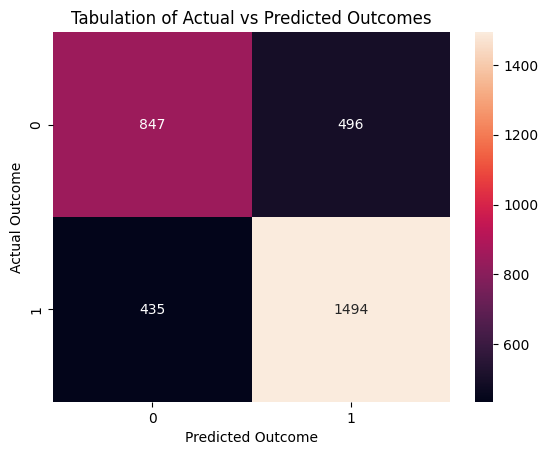

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

actual_vs_predicted = pd.concat([todayPredictions['ACTUAL_OUTCOME'], todayPredictions['Predicted_Home_Win']], axis=1)
actual_vs_predicted.columns = ['Actual Outcome', 'Predicted Outcome']

tabulated_results = pd.crosstab(actual_vs_predicted['Actual Outcome'], actual_vs_predicted['Predicted Outcome'])

plt.figure()
sns.heatmap(tabulated_results, annot=True, fmt='g')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.title('Tabulation of Actual vs Predicted Outcomes')
plt.show()


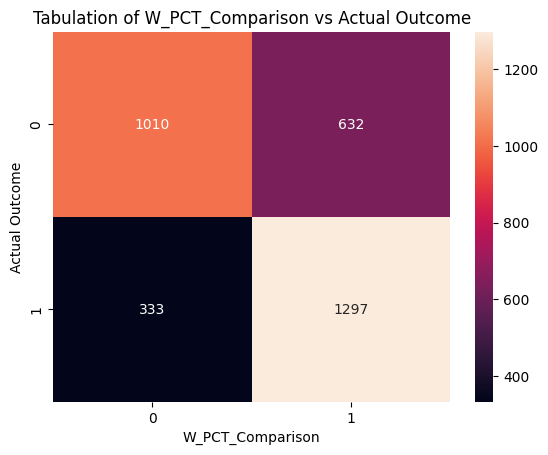

In [ ]:
x_rawdata['W_PCT_comparison'] = np.where(x_rawdata['W_PCT'] > x_rawdata['W_PCT.1'], 1, 0)
todayPredictions['W_PCT_comparison'] = x_rawdata['W_PCT_comparison']
todayPredictions['W_PCT'] =x_rawdata['W_PCT']
todayPredictions['W_PCT.1'] =x_rawdata['W_PCT.1']

actual_vs_predicted = pd.concat([x_rawdata['W_PCT_comparison'], x_rawdata['Home-Team-Win']], axis=1)
actual_vs_predicted.columns = ['W_PCT_Comparison', 'Actual Outcome']

tabulated_results = pd.crosstab(actual_vs_predicted['W_PCT_Comparison'], actual_vs_predicted['Actual Outcome'])

plt.figure()
sns.heatmap(tabulated_results, annot=True, fmt='g')
plt.xlabel('W_PCT_Comparison')
plt.ylabel('Actual Outcome')
plt.title('Tabulation of W_PCT_Comparison vs Actual Outcome')
plt.show()


In [ ]:
todayPredictions['Win_PCT_Correct'] = np.where(todayPredictions['W_PCT_comparison'] == todayPredictions['ACTUAL_OUTCOME'], 1, 0)
print(todayPredictions['Win_PCT_Correct'].value_counts())

1    2307
0     965
Name: Win_PCT_Correct, dtype: int64


In [ ]:
todayPredictions['Correct_Home_Win'] = np.where((todayPredictions['Predicted_Home_Win'] == 1) & (todayPredictions['ACTUAL_OUTCOME'] == 1), 1, 0)
todayPredictions['Correct_Away_Win'] = np.where((todayPredictions['Predicted_Home_Win'] == 0) & (todayPredictions['ACTUAL_OUTCOME'] == 0), 1, 0)
todayPredictions['correct_win_but_lower_w_pct'] = np.where((todayPredictions['Correct_Home_Win'] == 1) & (todayPredictions['W_PCT'] < todayPredictions['W_PCT.1']) | (todayPredictions['Correct_Away_Win'] == 1) & (todayPredictions['W_PCT'] > todayPredictions['W_PCT.1']), 1, 0)
print(todayPredictions['correct_win_but_lower_w_pct'].value_counts())

0    3091
1     181
Name: correct_win_but_lower_w_pct, dtype: int64


In [ ]:
todayPredictions['UnderDog_won'] = np.where((todayPredictions['ACTUAL_OUTCOME'] == 1) & (todayPredictions['W_PCT'] < todayPredictions['W_PCT.1']) | (todayPredictions['ACTUAL_OUTCOME'] == 0) & (todayPredictions['W_PCT'] > todayPredictions['W_PCT.1']), 1, 0)
print(todayPredictions['UnderDog_won'].value_counts())

0    2340
1     932
Name: UnderDog_won, dtype: int64


In [ ]:
# prompt: print all rows where 'correct_win_but_lower_w_pct =1

todayPredictions.loc[todayPredictions['correct_win_but_lower_w_pct'] == 1]


,AWAY,HOME,Predicted_Home_Win,HOME_TEAM_NAME,AWAY_TEAM_NAME,ACTUAL_OUTCOME,Correct,W_PCT_comparison,W_PCT,W_PCT.1,Win_PCT_Correct,Correct_Home_Win,Correct_Away_Win,correct_win_but_lower_w_pct,UnderDog_won
19,0.451573,0.548427,1,Miami Heat,Toronto Raptors,1,1,0,0.580,0.679,0,1,0,1,1
68,0.292432,0.707568,1,Los Angeles Clippers,Oklahoma City Thunder,1,1,0,0.623,0.721,0,1,0,1,1
117,0.427081,0.572919,1,Miami Heat,Indiana Pacers,1,1,0,0.456,0.509,0,1,0,1,1
131,0.422947,0.577053,1,Chicago Bulls,Charlotte Bobcats,1,1,0,0.487,0.533,0,1,0,1,1
140,0.409456,0.590544,1,Los Angeles Lakers,Orlando Magic,1,1,0,0.333,0.342,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,0.368446,0.631554,1,Oklahoma City Thunder,San Antonio Spurs,1,1,0,0.720,0.756,0,1,0,1,1
3224,0.330621,0.669379,1,Boston Celtics,Minnesota Timberwolves,1,1,0,0.462,0.480,0,1,0,1,1
3241,0.314055,0.685945,1,Oklahoma City Thunder,Utah Jazz,1,1,0,0.625,0.646,0,1,0,1,1
3253,0.438641,0.561359,1,Philadelphia 76ers,Houston Rockets,1,1,0,0.527,0.534,0,1,0,1,1


In [ ]:
# prompt: print the top ten rows where the greatest different in W_PCT AND W_PCT.1 but  'correct_win_but_lower_w_pct=1

todayPredictions.loc[(todayPredictions['correct_win_but_lower_w_pct'] == 1) & (todayPredictions['W_PCT_comparison'] == 1)]


,AWAY,HOME,Predicted_Home_Win,HOME_TEAM_NAME,AWAY_TEAM_NAME,ACTUAL_OUTCOME,Correct,W_PCT_comparison,W_PCT,W_PCT.1,Win_PCT_Correct,Correct_Home_Win,Correct_Away_Win,correct_win_but_lower_w_pct,UnderDog_won
1102,0.589181,0.410819,0,Memphis Grizzlies,San Antonio Spurs,0,1,1,0.357,0.346,0,0,1,1,1
1151,0.603353,0.396647,0,Charlotte Hornets,Detroit Pistons,0,1,1,0.423,0.396,0,0,1,1,1
2816,0.529067,0.470933,0,Milwaukee Bucks,Los Angeles Clippers,0,1,1,0.365,0.347,0,0,1,1,1
2906,0.505891,0.494109,0,Toronto Raptors,Golden State Warriors,0,1,1,0.684,0.680,0,0,1,1,1


In [ ]:
# prompt: list all of x_test column names laterally

print(list(x_test.columns))


['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']


In [ ]:
def evaluate_model(model, X, y, metric='accuracy'):
    # Predict using the model
    predictions = model.predict(X)

    # Compute the metric (e.g., accuracy)
    if metric == 'accuracy':
        accuracy = np.mean(np.argmax(predictions, axis=1) == y)
        return accuracy


In [ ]:
baseline_performance = evaluate_model(model, x_test, y_test)


103/103 [==============================] - 0s 2ms/step


In [ ]:
importance_scores = []
x_test = x_test.to_numpy()
for i in range(x_test.shape[1]):  # Assuming X_test is a NumPy array
    # Save original column
    original_column = x_test[:, i].copy()

    # Permute the column
    np.random.shuffle(x_test[:, i])

    # Calculate new performance
    new_performance = evaluate_model(model, x_test, y_test)

    # Restore original column
    x_test[:, i] = original_column

    # Calculate importance
    importance = baseline_performance - new_performance
    importance_scores.append(importance)



103/103 [==============================] - 0s 2ms/step


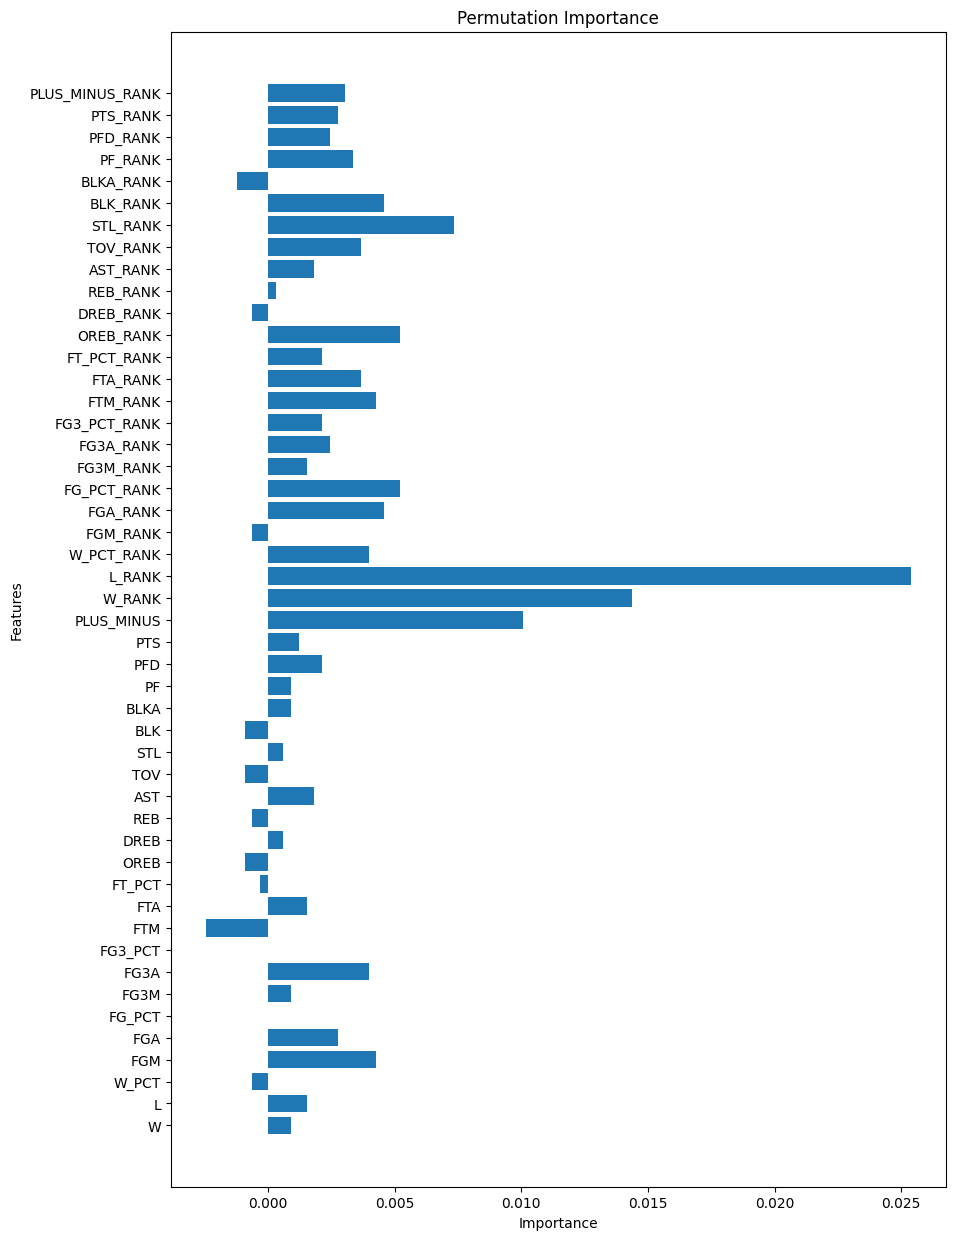

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have feature names
feature_names = ['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']

plt.figure(figsize=(10, 15))
plt.barh(range(len(importance_scores)), importance_scores, align='center')
plt.yticks(range(len(importance_scores)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.show()

### PREDICTING UPCOMING GAMES OF YOUR CHOICE


In [ ]:
# prompt: convert nbastats excel to df

import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('NBAStats.xlsx')

In [ ]:
df.head()

,TEAM,GP,W,W_RANK,L,L_RANK,W_PCT,W_PCT_RANK,MIN,PTS,...,BLK,BLK_RANK,BLKA,BLKA_RANK,PF,PF_RANK,PFD,PFD_RANK,PLUS_MINUS,PLUS_MINUS_RANK
0,Boston Celtics,22,17,1,5,1,0.773,1,48.5,117.4,...,6.0,8,3.9,29,17.6,2,18.5,2,8.4,2
1,Minnesota Timberwolves,22,17,2,5,2,0.773,2,48.2,112.7,...,6.4,2,4.9,19,19.5,12,20.8,24,6.8,4
2,Milwaukee Bucks,24,17,3,7,3,0.708,3,48.4,123.3,...,5.7,10,4.3,26,20.0,16,21.0,26,3.9,8
3,Philadelphia 76ers,23,16,4,7,4,0.696,4,48.2,122.3,...,6.0,6,5.8,7,20.5,22,20.3,20,9.2,1
4,Orlando Magic,23,16,6,7,6,0.696,5,48.0,114.0,...,5.6,11,4.9,20,21.8,26,23.3,30,5.1,5


In [ ]:
x_train.columns


Index(['W', 'L', 'W_PCT', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK'],
      dtype='object')

In [ ]:
# prompt: give me df column names listed laterally

df.columns


Index(['TEAM', 'GP', 'W', 'W_RANK', 'L', 'L_RANK', 'W_PCT', 'W_PCT_RANK',
       'MIN', 'PTS', 'PTS_RANK', 'FGM', 'FGM_RANK', 'FGA', 'FGA_RANK', 'FG%',
       'FG%_RANK', '3PM', '3PM_RANK', '3PA', '3PA_RANK', '3P%', '3P%_RANK',
       'FTM', 'FTM_RANK', 'FTA', 'FTA_RANK', 'FT%', 'FT%_RANK', 'OREB',
       'OREB_RANK', 'DREB', 'DREB_RANK', 'REB', 'REB_RANK', 'AST', 'AST_RANK',
       'TOV', 'TOV_RANK', 'STL', 'STL_RANK', 'BLK', 'BLK_RANK', 'BLKA',
       'BLKA_RANK', 'PF', 'PF_RANK', 'PFD', 'PFD_RANK', 'PLUS_MINUS',
       'PLUS_MINUS_RANK'],
      dtype='object')

In [ ]:
# prompt: individually change names of df columns

df.rename(columns={'FG%': 'FG_PCT'}, inplace=True)
df.rename(columns={'FG%_RANK': 'FG_PCT_RANK'}, inplace=True)
df.rename(columns={'3PM': 'FG3M'}, inplace=True)
df.rename(columns={'3PM_RANK': 'FG3M_RANK'}, inplace=True)
df.rename(columns={'3PA': 'FG3A'}, inplace=True)
df.rename(columns={'3PA_RANK': 'FG3A_RANK'}, inplace=True)
df.rename(columns={'3P%': 'FG3_PCT'}, inplace=True)
df.rename(columns={'3P%_RANK': 'FG3_PCT_RANK'}, inplace=True)
df.rename(columns={'FT%': 'FT_PCT'}, inplace=True)
df.rename(columns={'FT%_RANK': 'FT_PCT_RANK'}, inplace=True)


### RUN CODE BELOW AND ENTER THE TEAMS PLAYING EACH OTHER TO GET OUR PREDICTION


In [ ]:
def get_team_stats(team1, team2):
  df_team1 = df[df['TEAM'] == team1]
  df_team2 = df[df['TEAM'] == team2]
  df_filtered = pd.concat([df_team1, df_team2])
  df_filtered = df_filtered.drop(["MIN"], axis = 1)
  df_filtered_noname = df_filtered.drop(["TEAM"], axis = 1)
  df_filtered_noname = df_filtered_noname.drop(["GP"], axis = 1)
  df_filtered_noname = df_filtered_noname.astype(float)
  df_filtered_noname = df_filtered_noname.dropna()
  df_filtered_noname = df_filtered_noname.reset_index(drop=True)
  if len(df_filtered_noname) == 2:
        # Subtract team1's stats from team2's stats

    stats_diff = df_filtered_noname.iloc[1] - df_filtered_noname.iloc[0]
    return stats_diff
  else:
    return "Error: One or both teams not found in the data"
    winner = model.predict(stats_diff)
    return winner

team1 = input("Home Team? Please Type Full Team Name With No Typos ")

team2 = input("Away Team? Please Type Full Team Name With No Typos ")

stats_diff = get_team_stats(team1, team2)


if isinstance(stats_diff, str):
    print(stats_diff)
else:
    winner = model.predict(stats_diff.values.reshape(1, -1))
    Winner = pd.DataFrame(winner, columns=['AWAY', 'HOME'])
    if Winner['HOME'].iloc[0] > 0.5:
        print(f"{team1} is the winner by a probability of {Winner['HOME'].iloc[0]:.2f}")
        print(Winner)
    else:
        print(f"{team2} is the winner by a probability of {Winner['AWAY'].iloc[0]:.2f}")
        print(Winner)



Home Team? Please Type Full Team Name With No Typos Utah Jazz
Away Team? Please Type Full Team Name With No Typos New York Knicks
1/1 [==============================] - 0s 25ms/step
New York Knicks is the winner by a probability of 0.72
       AWAY      HOME
0  0.721258  0.278742
